*Use this notebook to complete the sentence similarity and embedding visualization tasks.*


In [1]:
from nltk.tokenize import word_tokenize

def tokenize_text(text):
    return word_tokenize(text.lower())

In [2]:
# List of sentences for comparison
sentences = [
    "The cat sat on the mat.",
    "A dog is playing in the yard.",
    "I need to buy groceries today.",
    "The feline was resting on the rug.",
    "Canines enjoy outdoor activities.",
    "My shopping list includes milk and bread.",
    "The weather is beautiful today.",
    "Programming requires logical thinking."
]

# Query sentence
query = "My pet cat is sleeping on the carpet."

# My word2vec

In [3]:
import numpy as np
import pickle
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity


def get_sentence_embedding(text, embedding_model):
    tokens = tokenize_text(text)
    # Filter tokens that exist in the embedding model
    vectors = [embedding_model[word] for word in tokens if word in embedding_model]
    
    if not vectors:
        return np.zeros(embedding_dim) # Return zero vector if no words found
    
    return np.mean(vectors, axis=0)

file_path = 'word2vec_embeddings.pkl'

data = pd.read_pickle('word2vec_embeddings.pkl')

embedding_matrix = data['embeddings']
word_lookup = data['word2idx']
embedding_dim = embedding_matrix.shape[1]

def get_sentence_embedding(text, matrix, lookup):
    tokens = tokenize_text(text)
    
    vectors = []
    for word in tokens:
        if word in lookup:
            idx = lookup[word]      
            vector = matrix[idx]    
            vectors.append(vector)
    
    if not vectors:
        return np.zeros(embedding_dim)
    
    return np.mean(vectors, axis=0)

query = "My pet cat is sleeping on the carpet."
query_vec = get_sentence_embedding(query, embedding_matrix, word_lookup).reshape(1, -1)
sent_vec = get_sentence_embedding(query, embedding_matrix, word_lookup).reshape(1, -1)
score = cosine_similarity(query_vec, sent_vec)[0][0]
print(f"{score:.4f} | {query}")

for s in sentences:
    sent_vec = get_sentence_embedding(s, embedding_matrix, word_lookup).reshape(1, -1)
    score = cosine_similarity(query_vec, sent_vec)[0][0]
    print(f"{score:.4f} | {s}")

1.0000 | My pet cat is sleeping on the carpet.
0.4843 | The cat sat on the mat.
0.5271 | A dog is playing in the yard.
0.4457 | I need to buy groceries today.
0.4296 | The feline was resting on the rug.
0.1431 | Canines enjoy outdoor activities.
0.3561 | My shopping list includes milk and bread.
0.3699 | The weather is beautiful today.
-0.0220 | Programming requires logical thinking.


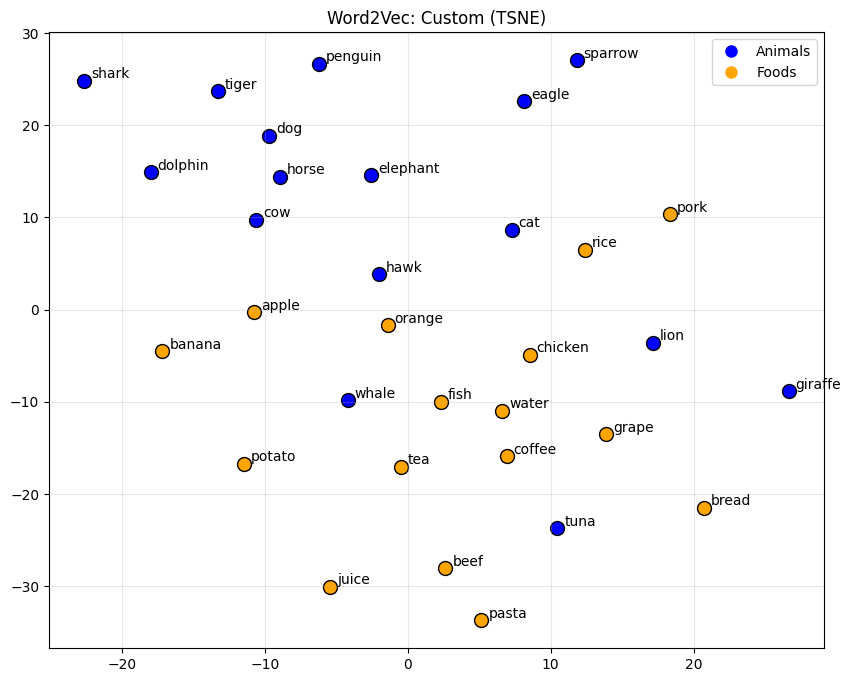

/Users/alecxszhang/Desktop/Stat 359/stat359/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/alecxszhang/Desktop/Stat 359/stat359/.venv/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


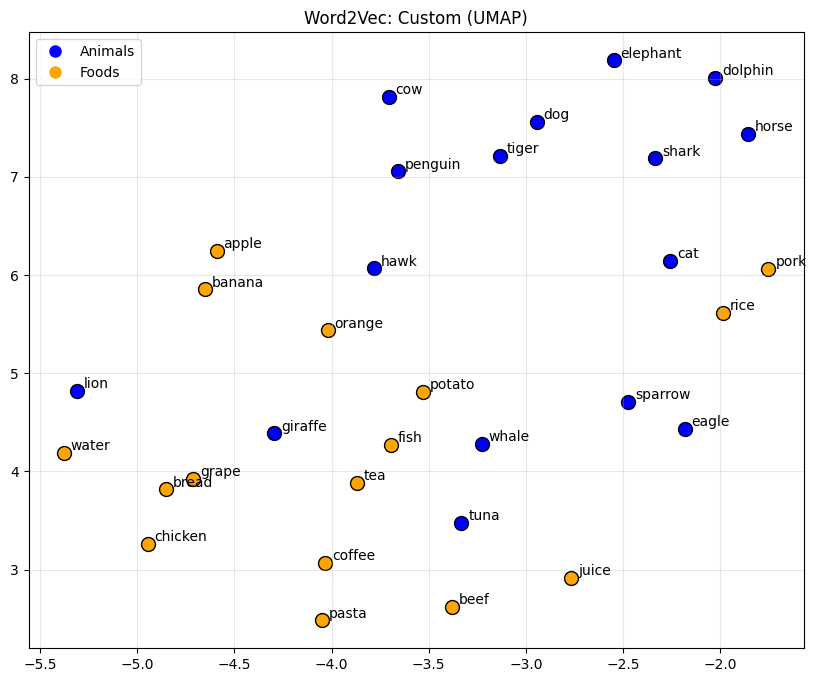

In [6]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.manifold import TSNE
import umap



def plot_embeddings(matrix, lookup, title, method='tsne'):
    labels = []
    vectors = []
    colors = []
    
    categories = {'animals': animals, 'foods': foods}
    palette = {'animals': 'blue', 'foods': 'orange'}
    
    found_count = 0
    
    for cat_name, word_list in categories.items():
        for word in word_list:
            if word in lookup:
                idx = lookup[word]
                vectors.append(matrix[idx])
                labels.append(word)
                colors.append(palette[cat_name])
                found_count += 1
    

    vectors = np.array(vectors)

    # Dimensionality Reduction
    if method == 'tsne':
        reducer = TSNE(n_components=2, perplexity=min(5, found_count-1), random_state=42)
    else:
        reducer = umap.UMAP(n_neighbors=min(5, found_count-1), min_dist=0.3, random_state=42)
        
    embedding_2d = reducer.fit_transform(vectors)

    # Plotting
    plt.figure(figsize=(10, 8))
    for i in range(len(labels)):
        plt.scatter(embedding_2d[i, 0], embedding_2d[i, 1], c=colors[i], edgecolors='k', s=100)
        plt.annotate(labels[i], (embedding_2d[i, 0], embedding_2d[i, 1]), xytext=(5, 2), textcoords='offset points')
    
    # Create a custom legend
    from matplotlib.lines import Line2D
    legend_elements = [Line2D([0], [0], marker='o', color='w', label='Animals', markerfacecolor='blue', markersize=10),
                       Line2D([0], [0], marker='o', color='w', label='Foods', markerfacecolor='orange', markersize=10)]
    plt.legend(handles=legend_elements)
    
    plt.title(f"{title} ({method.upper()})")
    plt.grid(True, alpha=0.3)
    plt.show()


plot_embeddings(embedding_matrix, word_lookup, "Word2Vec: Custom", method='tsne')


plot_embeddings(embedding_matrix, word_lookup, "Word2Vec: Custom", method='umap')

# Gensim Word2vec

In [7]:
file_path = 'word2vec_gensim_embeddings.pkl'

data = pd.read_pickle(file_path)

embedding_matrix = data['embeddings']
word_lookup = data['word2idx']
embedding_dim = embedding_matrix.shape[1]

query = "My pet cat is sleeping on the carpet."
query_vec = get_sentence_embedding(query, embedding_matrix, word_lookup).reshape(1, -1)
sent_vec = get_sentence_embedding(query, embedding_matrix, word_lookup).reshape(1, -1)
score = cosine_similarity(query_vec, sent_vec)[0][0]
print(f"{score:.4f} | {query}")

for s in sentences:
    sent_vec = get_sentence_embedding(s, embedding_matrix, word_lookup).reshape(1, -1)
    score = cosine_similarity(query_vec, sent_vec)[0][0]
    print(f"{score:.4f} | {s}")

1.0000 | My pet cat is sleeping on the carpet.
0.6874 | The cat sat on the mat.
0.6009 | A dog is playing in the yard.
0.1883 | I need to buy groceries today.
0.4828 | The feline was resting on the rug.
0.0710 | Canines enjoy outdoor activities.
0.4705 | My shopping list includes milk and bread.
0.4873 | The weather is beautiful today.
0.0672 | Programming requires logical thinking.


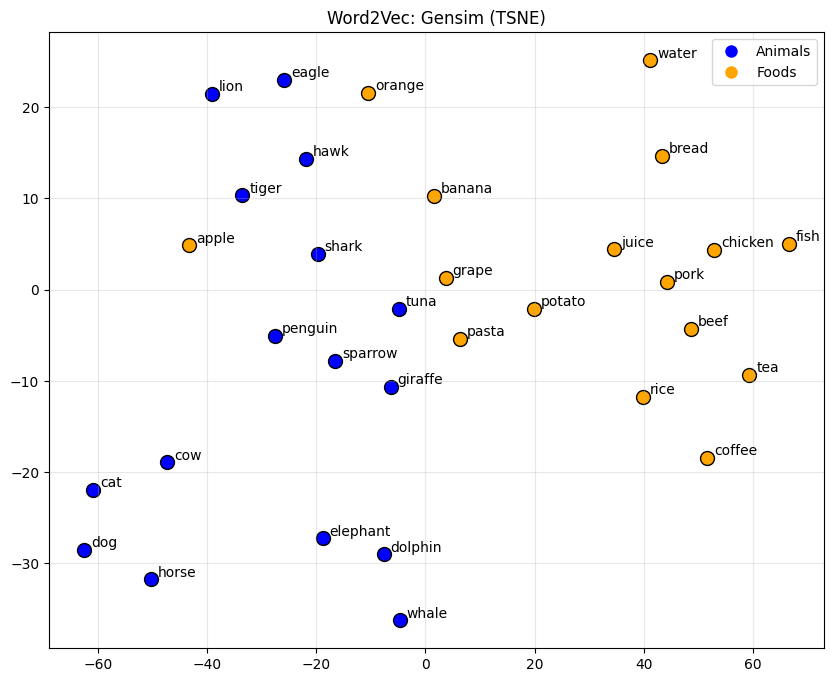

/Users/alecxszhang/Desktop/Stat 359/stat359/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/alecxszhang/Desktop/Stat 359/stat359/.venv/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


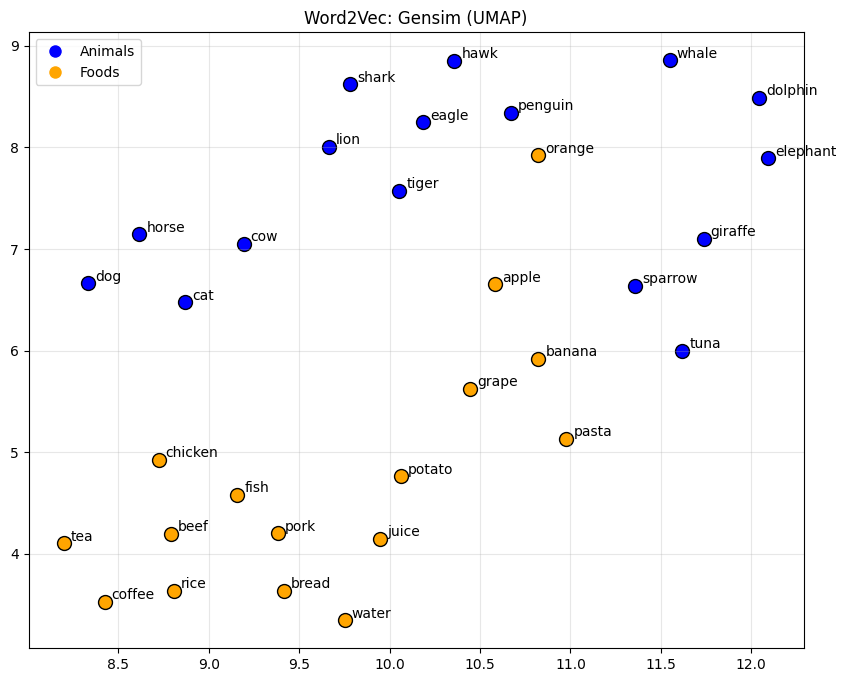

In [8]:

plot_embeddings(embedding_matrix, word_lookup, "Word2Vec: Gensim", method='tsne')

plot_embeddings(embedding_matrix, word_lookup, "Word2Vec: Gensim", method='umap')

# Gensim Word2Vec Google

In [9]:
from gensim.models import KeyedVectors

google_model = KeyedVectors.load('word2vec-google-news-300.model')
fasttext_model = KeyedVectors.load('fasttext-wiki-news-subwords-300.model')


def get_gensim_sentence_embedding(text, model):
    tokens = tokenize_text(text)
    vectors = [model[word] for word in tokens if word in model]
    
    if not vectors:
        return np.zeros(model.vector_size)
    
    return np.mean(vectors, axis=0)
pretrained_models = {
    "Pretrained Word2Vec (Google)": google_model,
    "Pretrained FastText (Wiki)": fasttext_model
}

for name, model in pretrained_models.items():
    print(f"{name}")
    q_vec = get_gensim_sentence_embedding(query, model).reshape(1, -1)
    
    for s in sentences:
        s_vec = get_gensim_sentence_embedding(s, model).reshape(1, -1)
        score = cosine_similarity(q_vec, s_vec)[0][0]
        print(f"{score:.4f} | {s}")

Pretrained Word2Vec (Google)
0.7369 | The cat sat on the mat.
0.6483 | A dog is playing in the yard.
0.3718 | I need to buy groceries today.
0.7794 | The feline was resting on the rug.
0.4281 | Canines enjoy outdoor activities.
0.4970 | My shopping list includes milk and bread.
0.4310 | The weather is beautiful today.
0.2979 | Programming requires logical thinking.
Pretrained FastText (Wiki)
0.9114 | The cat sat on the mat.
0.8512 | A dog is playing in the yard.
0.5858 | I need to buy groceries today.
0.9247 | The feline was resting on the rug.
0.6504 | Canines enjoy outdoor activities.
0.8350 | My shopping list includes milk and bread.
0.8090 | The weather is beautiful today.
0.6135 | Programming requires logical thinking.


In [10]:

def plot_gensim_embeddings(model, title, method='tsne'):
    # Define categories
    categories = {
        'animals': ['dog', 'cat', 'horse', 'cow', 'lion', 'tiger', 'elephant', 'giraffe', 'eagle', 'hawk', 'sparrow', 'penguin', 'shark', 'whale', 'dolphin', 'tuna'],
        'foods': ['apple', 'orange', 'banana', 'grape', 'bread', 'pasta', 'rice', 'potato', 'chicken', 'beef', 'pork', 'fish', 'coffee', 'tea', 'juice', 'water']
    }
    
    vectors = []
    labels = []
    colors = []
    palette = {'animals': 'blue', 'foods': 'orange'}


    for cat, word_list in categories.items():
        for word in word_list:
            if word in model:
                vectors.append(model[word])
                labels.append(word)
                colors.append(palette[cat])
    
    vectors = np.array(vectors)


    if method == 'tsne':
        reducer = TSNE(n_components=2, perplexity=min(5, len(vectors)-1), random_state=42, init='pca', learning_rate='auto')
    else:
        reducer = umap.UMAP(n_neighbors=min(5, len(vectors)-1), min_dist=0.3, random_state=42)
        
    coords = reducer.fit_transform(vectors)

    # 3. Plotting
    plt.figure(figsize=(10, 7))
    for i, label in enumerate(labels):
        plt.scatter(coords[i, 0], coords[i, 1], c=colors[i], edgecolors='k', s=80)
        plt.annotate(label, (coords[i, 0], coords[i, 1]), xytext=(5, 2), textcoords='offset points', fontsize=9)
    
    plt.title(f"{title} ({method.upper()})")
    plt.grid(True, alpha=0.2)
    plt.show()

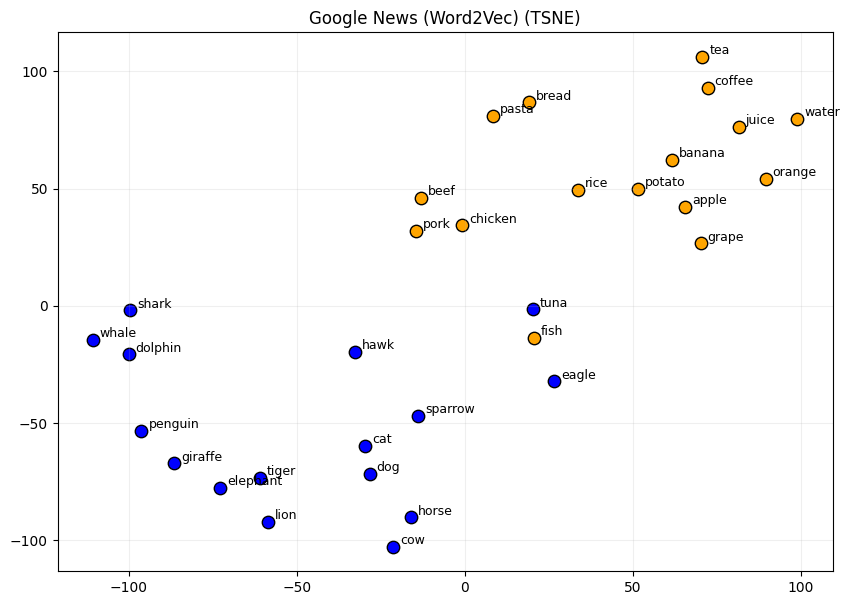

/Users/alecxszhang/Desktop/Stat 359/stat359/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/alecxszhang/Desktop/Stat 359/stat359/.venv/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


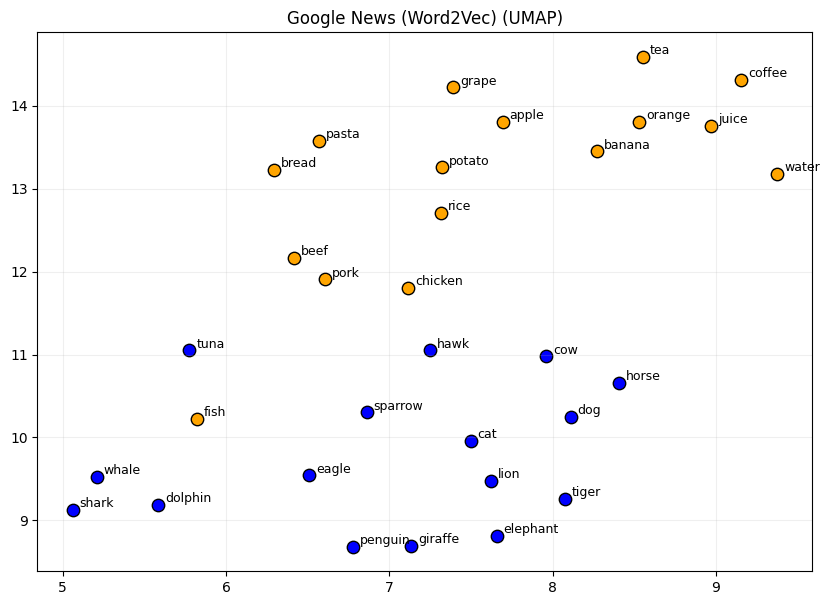

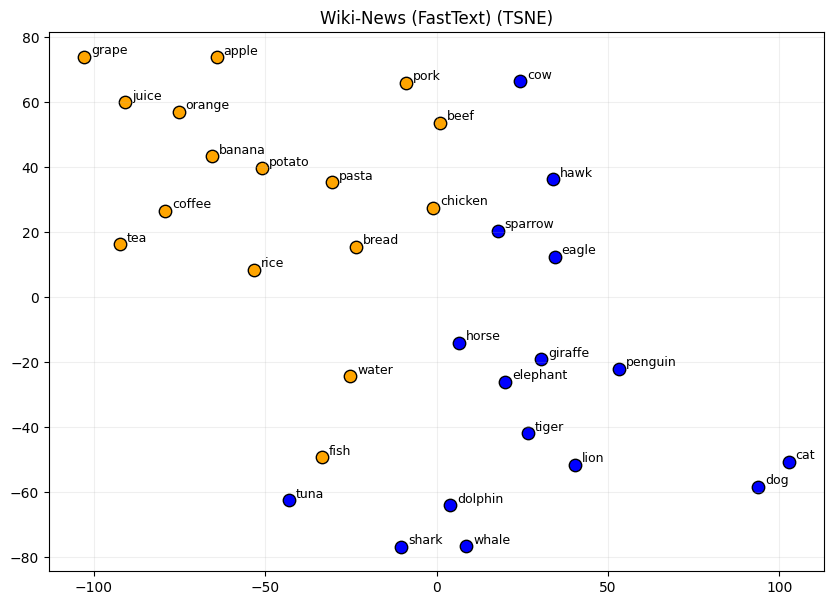

/Users/alecxszhang/Desktop/Stat 359/stat359/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/alecxszhang/Desktop/Stat 359/stat359/.venv/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


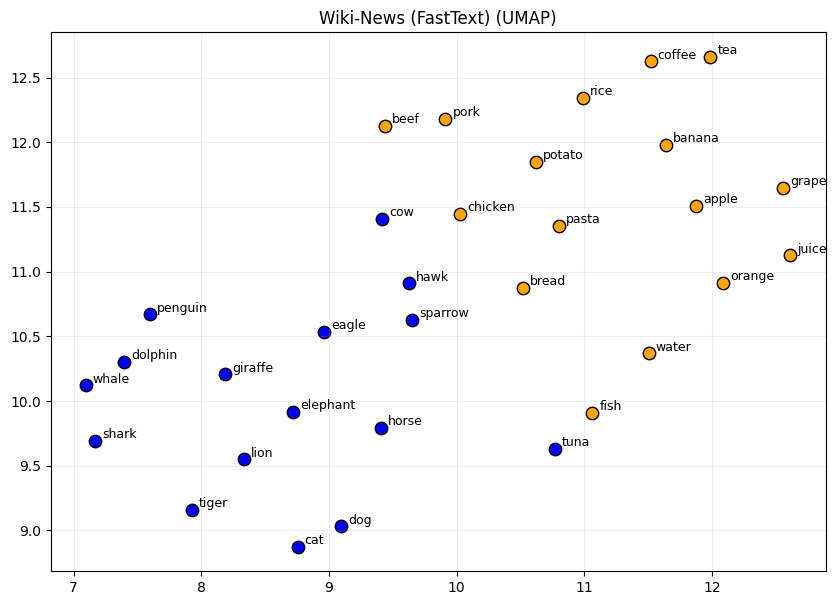

In [11]:
# GOOGLE NEWS (Word2Vec)

plot_gensim_embeddings(google_model, "Google News (Word2Vec)", method='tsne')
plot_gensim_embeddings(google_model, "Google News (Word2Vec)", method='umap')

# WIKI NEWS (FastText)

plot_gensim_embeddings(fasttext_model, "Wiki-News (FastText)", method='tsne')
plot_gensim_embeddings(fasttext_model, "Wiki-News (FastText)", method='umap')

# Comparison of sentence similarity

The Gensim and my model trained on 19 million pairs generally performed a lot worse than the larger pretrained models. The scores are low on unrelated sentences and even negative at some point. On the otherhand, the pretrained large models have good scores even on very unrelated sentences, and the larger the database (wiki for example) the better the performance on unrelated context/similarity. With similar sentences, the cosine similarity is also very high for related sentences and are higher for bigger training contexts than the smaller ones.

# Embedding Visualization

For my custom model, the visualizations don't show a great separation between animals and food, in addition some the embedding contexts on both graphs don't show much relation/the relation between closely clustered points don't make sense. We see a similar pattern on the Gensim graphs are arguably worse/less distinctively powerful. There are embeddings/clusterings that don't make sense and the garph shows little distinction between animals and food.

On the other hand, the large models from Google and wikitext show almost a perfect clustering separation between animals and food with Google being a little worse (and, understandably, struggling to isolate/separate fish). However some of the clustering/embeddings are a little confusing as to why they are bunch together. The best performing model is wikitext. It has perfect separation between food and animal, and all the embeddings make sense, probably as a result of the massive datasource.

## AI Use Disclosure (Required)

If you used any AI-enabled tools (e.g., ChatGPT, GitHub Copilot, Claude, or other LLM assistants) while working on this assignment, you must disclose that use here. The goal is transparency-not punishment.

In your disclosure, briefly include:
- **Tool(s) used:** (name + version if known)
- **How you used them:** (e.g., concept explanation, debugging, drafting code, rewriting text)
- **What you verified yourself:** (e.g., reran the notebook, checked outputs/plots, checked shapes, read documentation)
- **What you did *not* use AI for (if applicable):** (optional)

You are responsible for the correctness of your submission, even if AI suggested code or explanations.

#### <font color="red">Write your disclosure here.</font>


Tools: Googles Flash 1.5
claude Sonnet 4.5.

I used them to help me learn how to code out the models and giving some structure for my word2vec training, how to unpackage the data, and some assistance on how to graph TSNE UMAP as it was my first time.

I did my best to check how the word2vec was trained with other online documentation, make sure my error was calculated correctly, and to make sure that the graphings were classified correctly and how I did that. 